In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

C:\Users\adhit\AppData\Local\Temp\ipykernel_11364\2294016119.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Youtube01-Psy.csv")
data = data[["CONTENT", "CLASS"]]
x = np.array(data["CONTENT"])
y = np.array(data["CLASS"])

In [3]:
cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [4]:
model = BernoulliNB()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [5]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(ytest, predictions)
print(confusionMatrix)

[[27  0]
 [ 1 42]]


In [6]:
# Accuracy
print(model.score(xtest, ytest))

0.9857142857142858


In [7]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        43

    accuracy                           0.99        70
   macro avg       0.98      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



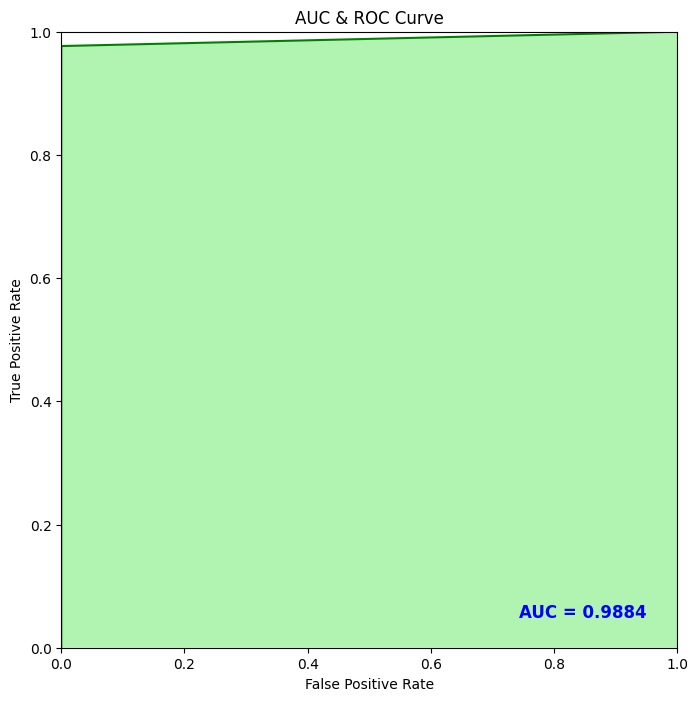

In [8]:
# AUC and ROC
import matplotlib.pyplot as plt
from sklearn import metrics
auc = metrics.roc_auc_score(ytest, predictions)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(ytest, predictions)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()